
    =================================================
    Milestone 1

    Nama  : Carlos Emmanuel Argado
    Batch : HCK-10

    Program ini dibuat untuk menganalisa gaji karyawan tech
    =================================================


# Case Study
We are a tech employee recruitment consultant firm that specializes in data analysis, and our client has been experiencing very minimal growth in its employment. Therefore, we assist our client by analyzing the historical trends and patterns to suggest on what job postings they should give.

# Problem Identification

[SMART]

Specific: Identify job trends and provide recommendations to our client on the types of jobs to be posted.

Measurable: Increase candidate recruitment for our client by 30%.

Achievable: By identifying the patterns of experience level, employment type, job title and salary, increasing candidate recruitment by 30% is attainable.

Relevant: balancing the employment demand & supply, sustaining employment growth.

Time-Bound: Achieve within next quarter.

Problem statement:
The goal is to enhance our client's employment growth, aiming for a 30% candidate recruitment increase by the next quarter. This can be achieved by recognizing the past trends on tech employment and knowing what job postings to be given out.

### Defining the Problem Statements
Main problem: Identify tech job trends to know the job postings to be made.

5W + 1H:
1. How is the salary data distributed?
2. What is the salary trend from 2020 - 2023?
3. Which is the job-level with the most workers?
4. Which experience level jobs have the highest salaries over the past 4 years?
5. How much is the salary that most people have?
6. Is salary correlated to remote-work ratio?

# Data Loading

In [ ]:
'''fungsi untuk mengimpor package yang diperlukan'''
import pandas as pd
from scipy import stats
import requests

In [ ]:
df = pd.read_csv('/content/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L
1,2023,SE,FT,Business Intelligence Analyst,115600,USD,115600,US,0,US,M
2,2023,SE,FT,Business Intelligence Analyst,79700,USD,79700,US,0,US,M
3,2023,EN,FT,Applied Scientist,281700,USD,281700,US,0,US,M
4,2023,EN,FT,Applied Scientist,141100,USD,141100,US,0,US,M


In [ ]:
'''pengecekan data yang ada dari database'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8270 non-null   int64 
 1   experience_level    8270 non-null   object
 2   employment_type     8270 non-null   object
 3   job_title           8270 non-null   object
 4   salary              8270 non-null   int64 
 5   salary_currency     8270 non-null   object
 6   salary_in_usd       8270 non-null   int64 
 7   employee_residence  8270 non-null   object
 8   remote_ratio        8270 non-null   int64 
 9   company_location    8270 non-null   object
 10  company_size        8270 non-null   object
dtypes: int64(4), object(7)
memory usage: 710.8+ KB


insight: terdapat 11 column dengan tipe data "int64" dan "object"

# Data Cleaning

In [ ]:
'''pengecekan akan adanya input data dengan nilai null'''
df[df.isna().any(axis=1)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


insight: berdasarkan pengecekan, tidak ditemukan input data yang menunjukkan null value.

In [ ]:
'''penghapusan column yang tidak relevan untuk pengolahan data'''
df.drop(columns = 'salary', inplace = True)
df.drop(columns = 'salary_currency', inplace = True)
df.drop(columns = 'employee_residence', inplace = True)
df.drop(columns = 'company_location', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         8270 non-null   int64 
 1   experience_level  8270 non-null   object
 2   employment_type   8270 non-null   object
 3   job_title         8270 non-null   object
 4   salary_in_usd     8270 non-null   int64 
 5   remote_ratio      8270 non-null   int64 
 6   company_size      8270 non-null   object
dtypes: int64(3), object(4)
memory usage: 452.4+ KB


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2023,SE,FT,Business Data Analyst,79976,100,L
1,2023,SE,FT,Business Intelligence Analyst,115600,0,M
2,2023,SE,FT,Business Intelligence Analyst,79700,0,M
3,2023,EN,FT,Applied Scientist,281700,0,M
4,2023,EN,FT,Applied Scientist,141100,0,M


# Analysis & Calculations

## Descriptive statistics

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [ ]:
import pandas as pd
import scipy.stats
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
import seaborn as sns

## Modeling/Exploratory Data Analysis

We will be testing whether or not salary is affected by other factors, using 95% confidence interval

### 1. dependent variable analysis

In [ ]:
'''fungsi untuk menghitung mean, median, modus'''
mean = df['salary_in_usd'].mean()
median = df['salary_in_usd'].median()
modus = df['salary_in_usd'].mode()[0]
range = df['salary_in_usd'].max() - df['salary_in_usd'].min()

print(f'''
mean: {mean}
median: {median}
modus: {modus}
range: {range}
      ''')


mean: 149349.48875453445
median: 142200.0
modus: 150000
range: 435000
      


In [ ]:
''''''
salary150 = df['salary_in_usd'].value_counts().get(150000)
print(f'number of jobs with 150k salary: {salary150}')
print()
job150 = df['job_title'][df['salary_in_usd'] == 150000].value_counts()
job150.head()

number of jobs with 150k salary: 182



Data Engineer                44
Data Analyst                 34
Data Scientist               27
Machine Learning Engineer    23
Research Scientist           17
Name: job_title, dtype: int64

insight: terdapat 182 job dengan gaji USD150K dengan job paling banyak adalah Data Engineer, Data Analyst, Data Scientist, Machine Learning Engineer, dan Research Scientist.

In [ ]:
'''fungsi untuk menghitung skewness & standard deviation'''
skew = df['salary_in_usd'].skew()
print(f'skewness: {skew}')
std = df['salary_in_usd'].std()
print(f'standard deviation: {std}')

skewness: 0.6045621204725046
standard deviation: 64061.988742230606


insight: salary memiliki nilai skewness 0.6 sehingga menunjukkan pemusatan data yang condong ke kiri.

In [ ]:
'''mencari upper & lower boundaries dengan Tukey's rule'''
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 307250.00
Lower Boundary: -16350.00


### 2. independent variable analysis

In [ ]:
'''fungsi untuk menghitung jumlah employment berdasarkan level of experience'''
explv = df['experience_level'].value_counts()
print(explv)

SE    5958
MI    1622
EN     439
EX     251
Name: experience_level, dtype: int64


insight: job position paling banyak ditempati oleh senior level.

In [ ]:
'''fungsi untuk menghitung jumlah employment berdasarkan type of employment'''
empty = df['employment_type'].value_counts()
print(empty)

FT    8228
CT      18
PT      13
FL      11
Name: employment_type, dtype: int64


insight: job type paling banyak dipekerjakan oleh pekerja Full-time.

In [ ]:
'''fungsi untuk menghitung jumlah employment berdasarkan job title'''
jobtit = df['job_title'].value_counts()
jobtit.head()

Data Engineer                1964
Data Scientist               1742
Data Analyst                 1234
Machine Learning Engineer     852
Applied Scientist             240
Name: job_title, dtype: int64

insight: job title paling banyak adalah Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, dan Applied Scientist.

In [ ]:
'''fungsi untuk menghitung jumlah employment berdasarkan remote-work ratio'''
rmt = df['remote_ratio'].value_counts()
print(rmt)

0      4885
100    3168
50      217
Name: remote_ratio, dtype: int64


insight: working ratio paling banyak adalah null (20% remote).

In [ ]:
'''fungsi untuk menghitung jumlah employment berdasarkan company size'''
cmp_sz = df['company_size'].value_counts()
print(cmp_sz)

M    7391
L     712
S     167
Name: company_size, dtype: int64


insight: company size yang paling banyak mempekerjakan employee adalah Medium size company.

## ANOVA

In [ ]:
# salary for each level of experience
df.groupby('experience_level')[['salary_in_usd']].mean()

,salary_in_usd
experience_level,
EN,86217.694761
EX,189792.087649
MI,114572.121455
SE,161765.174387


insight: executive memiliki rata-rata gaji tertinggi sedangkan entry level memiliki rata-rata gaji terendah

In [ ]:
'''pengelompakan dari masing-masing level of experience untuk pengujian hipotesa korelasi'''
entry = df['salary_in_usd'][df['experience_level'] == 'EN']
exec = df['salary_in_usd'][df['experience_level'] == 'EX']
mid = df['salary_in_usd'][df['experience_level'] == 'MI']
senior = df['salary_in_usd'][df['experience_level'] == 'SE']

In [ ]:
'''
H0: salaries are not affected by position
H1: salaries are affected by position
'''
res = stats.f_oneway(entry, exec, mid, senior)
print('P-value:',res.pvalue)

alpha = 0.05
if res.pvalue < alpha:
  print('reject H0 and conclude that salaries are affected by position.')
else:
  print("don't reject H0 and conclude that salaries are not affected by position.")

P-value: 6.902080298651305e-288
reject H0 and conclude that salaries are affected by position.


In [ ]:
data = pd.DataFrame({
    'salary': df['salary_in_usd'],
    'exp': df['experience_level']
})

grouped = data.groupby('exp')['salary'].mean()
correlations = data.groupby('exp').apply(lambda group: spearmanr(group['salary'], group.index)[0])

print(correlations)

exp
EN   -0.137990
EX    0.080315
MI   -0.163504
SE   -0.104574
dtype: float64


insight: entry, mid, senior level jobs are negatively correlated with job salary while executive level jobs are positively related.

In [ ]:
# salary for each type of employment
df.groupby('employment_type')[['salary_in_usd']].mean()

,salary_in_usd
employment_type,
CT,120837.666667
FL,54734.363636
FT,149692.078877
PT,52053.153846


insight: Full-time memiliki rata-rata gaji tertinggi sedangkan Part-time memiliki rata-rata gaji terendah

In [ ]:
'''pengelompakan dari masing-masing type of employment untuk pengujian hipotesa korelasi'''
contract = df['salary_in_usd'][df['employment_type'] == 'CT']
freel = df['salary_in_usd'][df['employment_type'] == 'FL']
fullt = df['salary_in_usd'][df['employment_type'] == 'FT']
part = df['salary_in_usd'][df['employment_type'] == 'PT']

In [ ]:
'''
H0: salaries are not affected job type
H1: salaries are affected by job type
'''
res = stats.f_oneway(contract, freel, fullt, part)
print('P-value:',res.pvalue)

alpha = 0.05
if res.pvalue < alpha:
  print('reject H0 and conclude that salaries are affected by job type.')
else:
  print("don't reject H0 and conclude that salaries are not affected by job type.")

P-value: 1.5969063328560003e-12
reject H0 and conclude that salaries are affected by job type.


In [ ]:
data = pd.DataFrame({
    'salary': df['salary_in_usd'],
    'type': df['employment_type']
})

grouped = data.groupby('type')['salary'].mean()
correlations = data.groupby('type').apply(lambda group: spearmanr(group['salary'], group.index)[0])

print(correlations)

type
CT    0.196281
FL    0.009217
FT   -0.137842
PT   -0.076923
dtype: float64


insight: Contract and Full-time jobs are positively correlated with salary while Full-time and Part-time jobs are negatively correlated with salary.

In [ ]:
df['remote_ratio'] = df['remote_ratio'].replace({
    0: 'null',
    50: 'hybrid',
    100: 'remote'
})

In [ ]:
# salary for each type of working
df.groupby('remote_ratio')[['salary_in_usd']].mean()

,salary_in_usd
remote_ratio,
hybrid,82441.239631
null,155707.497851
remote,144128.597222


insight: null memiliki rata-rata gaji tertinggi sedangkan hybrid memiliki rata-rata gaji terendah

In [ ]:
'''pengelompakan dari masing-masing remote-work ratio untuk pengujian hipotesa korelasi'''
null = df['salary_in_usd'][df['remote_ratio'] == 'null']
hybrid = df['salary_in_usd'][df['remote_ratio'] == 'hybrid']
remote = df['salary_in_usd'][df['remote_ratio'] == 'remote']

In [ ]:
'''
H0: salaries are not affected by remote-work ratio
H1: salaries are affected by by remote-work ratio
'''
res = stats.f_oneway(null, hybrid, remote)
print('P-value:',res.pvalue)

alpha = 0.05
if res.pvalue < alpha:
  print('reject H0 and conclude that salaries are affected by remote-work ratio.')
else:
  print("don't reject H0 and conclude that salaries are not affected by remote-work ratio.")

P-value: 2.1774761405118757e-68
reject H0 and conclude that salaries are affected by remote-work ratio.


In [ ]:
data = pd.DataFrame({
    'salary': df['salary_in_usd'],
    'ratio': df['remote_ratio']
})

grouped = data.groupby('ratio')['salary'].mean()
correlations = data.groupby('ratio').apply(lambda group: spearmanr(group['salary'], group.index)[0])

print(correlations)

ratio
hybrid    0.071403
null     -0.099081
remote   -0.121332
dtype: float64


insight: hybrid and null working method are negatively correlated with salary while remote working method is positively correlated.

In [ ]:
df['company_size'] = df['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'
})

In [ ]:
# salary for each company size
df.groupby('company_size')[['salary_in_usd']].mean()

,salary_in_usd
company_size,
Large,133486.303371
Medium,152251.260723
Small,88556.622754


Insight: Medium company memiliki rata-rata gaji tertinggi sedangkan Small company memiliki rata-rata gaji terendah.

In [ ]:
'''pengelompakan dari masing-masing company size untuk pengujian hipotesa korelasi'''
large = df['salary_in_usd'][df['company_size'] == 'Large']
medium = df['salary_in_usd'][df['company_size'] == 'Medium']
small = df['salary_in_usd'][df['company_size'] == 'Small']

In [ ]:
'''
H0: salaries are not affected by company size
H1: salaries are affected by company size
'''
res = stats.f_oneway(large, medium, small)
print('P-value:',res.pvalue)

alpha = 0.05
if res.pvalue < alpha:
  print('reject H0 and conclude that salaries are affected by company size.')
else:
  print("don't reject H0 and conclude that salaries are not affected by company size.")

P-value: 9.921019933389864e-47
reject H0 and conclude that salaries are affected by company size.


In [ ]:
data = pd.DataFrame({
    'salary': df['salary_in_usd'],
    'size': df['company_size']
})

grouped = data.groupby('size')['salary'].mean()
correlations = data.groupby('size').apply(lambda group: spearmanr(group['salary'], group.index)[0])

print(correlations)

size
Large    -0.186090
Medium   -0.101862
Small    -0.095439
dtype: float64


insight: salaries are negatively correlated with all company sizes.

# Data Visualization

1. How is the salary data distributed?

skewness: 0.6045621204725046


<Axes: ylabel='Frequency'>

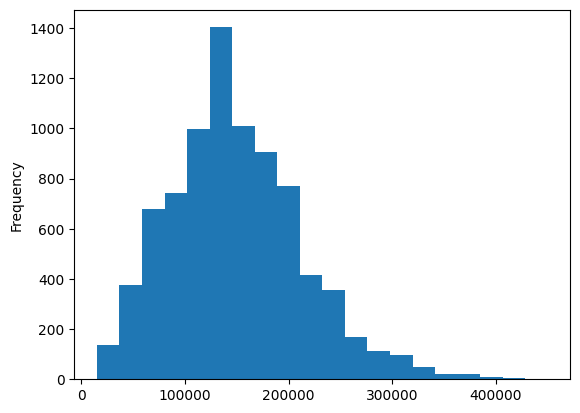

In [ ]:
skew = df['salary_in_usd'].skew()
print(f'skewness: {skew}')
df['salary_in_usd'].plot(kind='hist',bins=20)

insight: the skewness value shows positive value, indicating that it is skewed to the left.

2. What is the salary trend from 2020 - 2023?

In [ ]:
df.groupby('work_year')[['salary_in_usd']].mean()

,salary_in_usd
work_year,
2020,102250.866667
2021,99922.073394
2022,134508.234545
2023,155481.248301


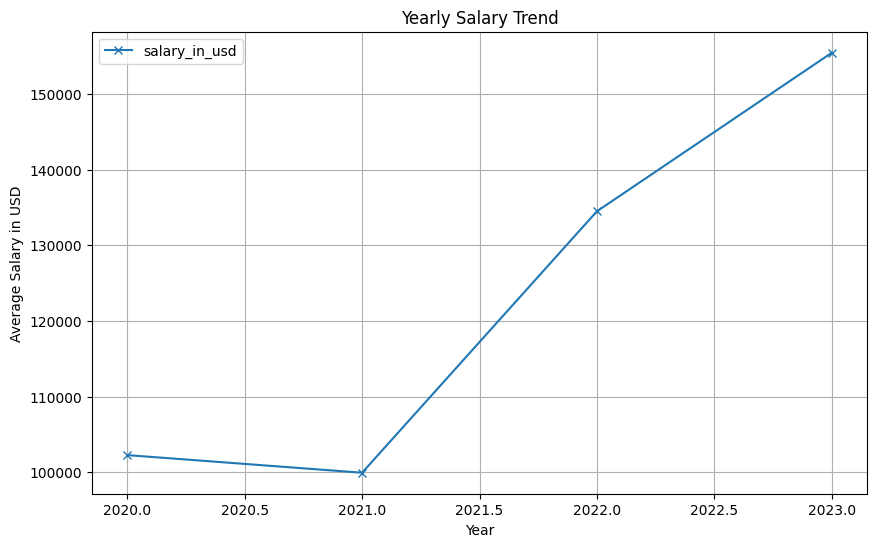

In [ ]:
grouped = df.groupby('work_year')[['salary_in_usd']].mean()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.title('Yearly Salary Trend')

plt.grid(True)
plt.show()

3. Which is the job-level with the most workers?

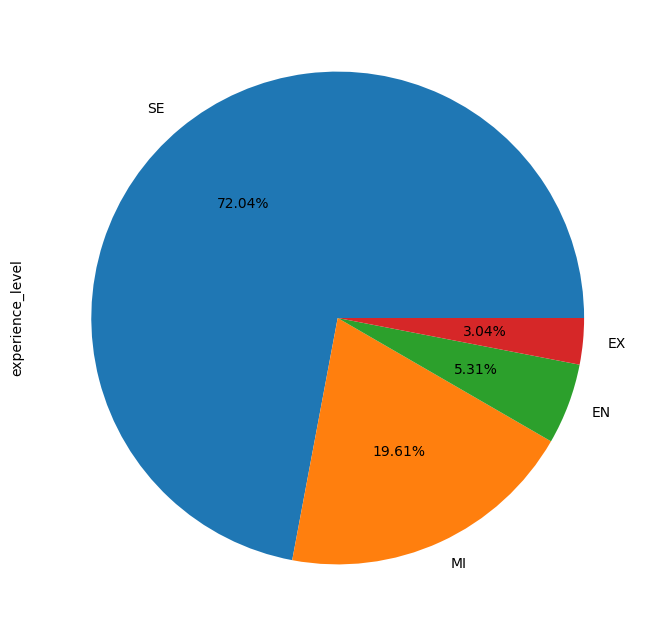

In [ ]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['experience_level'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

4. Which experience level jobs have the highest salaries over the past 4 years?

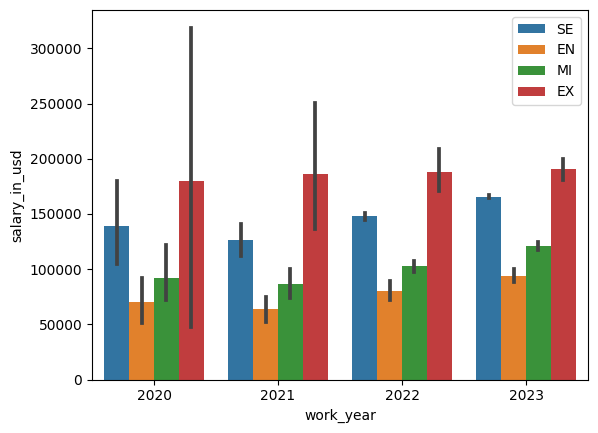

In [ ]:
data = df.groupby(['work_year','experience_level'])['salary_in_usd'].mean()

sns.barplot(data = df, x='work_year', y='salary_in_usd', orient='v', hue='experience_level')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

5. How much is the salary that most people have?

In [ ]:
modus = df['salary_in_usd'].mode()[0]
print(f'the salary that most people have is USD{modus}')

the salary that most people have is USD150000


6. Is salary correlated to remote-work ratio?

In [ ]:
'''
H0: salaries are not affected by remote-work ratio
H1: salaries are affected by by remote-work ratio
'''
res = stats.f_oneway(null, hybrid, remote)
print('P-value:',res.pvalue)

alpha = 0.05
if res.pvalue < alpha:
  print('reject H0 and conclude that salaries are affected by remote-work ratio.')
else:
  print("don't reject H0 and conclude that salaries are not affected by remote-work ratio.")

P-value: 2.1774761405118757e-68
reject H0 and conclude that salaries are affected by remote-work ratio.


Extra visualization: correlation plot of salary against experience level

Text(0.5, 0, 'test')

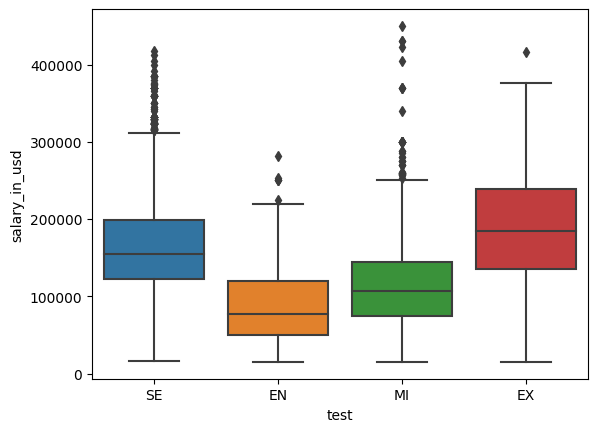

In [ ]:
sns.boxplot(df, x='experience_level', y='salary_in_usd')
plt.xlabel('test')

Extra visualization: pie chart of the top 5 tech jobs

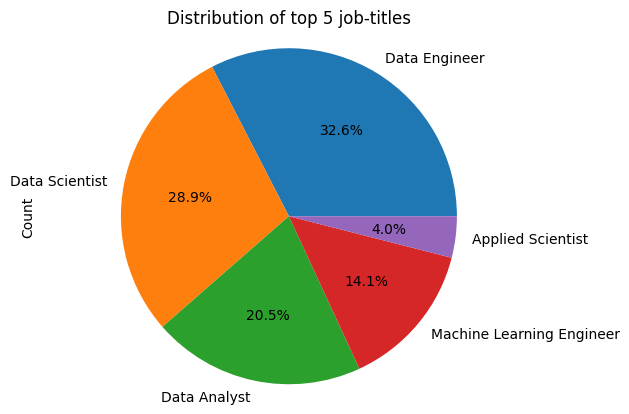

In [ ]:
job_vis = {
    'Job Title': ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Applied Scientist'],
    'Count': [1964, 1742, 1234, 852, 240]
}

pie_jobvis = pd.DataFrame(job_vis)

pie_jobvis.plot(kind='pie', y='Count', labels=pie_jobvis['Job Title'], autopct='%1.1f%%', legend=False)

plt.title('Distribution of top 5 job-titles')
plt.axis('equal')

plt.show()

# Conclusion & Recommendation
Our main objective was to analyze the past trends and patterns of tech job trends which in this case is the last 4 years, and provide recommendations to our clients on what kinds of job posting they shoud open in order to increase recruitment.

Based on observation on the dataset, we will analyze the salaries of tech job workers where it is segmented by experience level, employment type, remote-work ratio, and company size. Our calculations show that the average salary is USD149349.48 with the mode of USD150000 that is slightly above the mean value.

Further analysis show that most workers employed are in the senior level, most employees work full-time, and have a 20% or less remote working ratio. Most employees are also recruited by medium sized companies, with the most popular job title being Data Engineer.

From the statistical hypotheses of correlations being tested, we found that salaries are correlated to all the other factors. Taking the assumption of people being more attracted to higher paying jobs, here are some recommendations that we suggest to our client:
- most job postings opened should be for senior & mid experience levels.
- jobs offered should be full-time and either fully non-remote or fully remote.
- Data Engineer, Data Scientist, Data Analyst have the highest potential to incrase recruitment as those are the 3 most popular.
- offered salaries should be around the mode of USD150000/year

Link Tableau:

https://public.tableau.com/app/profile/carlos.argado/viz/milestone1_dashboard_carlos/Dashboard1?publish=yes